In [2]:
from sqlalchemy import create_engine
import pandas as pd

from paths import HERE

DB_PATH = "/home/vaunorage/PycharmProjects/clear/ClearBias/experiment_results.db"
conn = create_engine(f'sqlite:///{DB_PATH}')


In [9]:
query = """
WITH results_union AS (
    SELECT
        model_scores,
        group_key,
        couple_tpr,
        couple_fpr,
        group_size,
        nb_attributes,
        nb_groups,
        granularity,
        intersectionality,
        similarity,
        alea_uncertainty,
        epis_uncertainty,
        magnitude,
        frequency as sub_group_size,
        COUNT(CASE WHEN diff_outcome_y IS NOT NULL AND diff_outcome_x > 0 THEN 1 ELSE NULL END) OVER (PARTITION BY model_scores, group_key) AS number_of_found_cases,
        COUNT(CASE WHEN diff_outcome_x > 0 THEN 1 ELSE NULL END) OVER (PARTITION BY model_scores, group_key) AS partition_size
    FROM
        results_optuna
    UNION ALL
    SELECT
        model_scores,
        group_key,
        couple_tpr,
        couple_fpr,
        group_size,
        nb_attributes,
        nb_groups,
        granularity,
        intersectionality,
        similarity,
        alea_uncertainty,
        epis_uncertainty,
        magnitude,
        frequency as sub_group_size,
        COUNT(CASE WHEN diff_outcome_y IS NOT NULL AND diff_outcome_x > 0 THEN 1 ELSE NULL END) OVER (PARTITION BY model_scores, group_key) AS number_of_found_cases,
        COUNT(CASE WHEN diff_outcome_x > 0 THEN 1 ELSE NULL END) OVER (PARTITION BY model_scores, group_key) AS partition_size
    FROM
        results4
)
SELECT
    model_scores,
    group_key,
    couple_tpr,
    couple_fpr,
    group_size as gr,
    nb_attributes,
    nb_groups,
    granularity,
    intersectionality,
    similarity,
    1-alea_uncertainty as alea_uncertainty,
    1-epis_uncertainty as epis_uncertainty,
    magnitude,
    1-sub_group_size as group_size,
    number_of_found_cases,
    partition_size,
    CAST(number_of_found_cases AS FLOAT) / partition_size AS ratio_of_found_cases
FROM
    results_union;
"""

df = pd.read_sql_query(query, conn)
df

,model_scores,group_key,couple_tpr,couple_fpr,gr,nb_attributes,nb_groups,granularity,intersectionality,similarity,alea_uncertainty,epis_uncertainty,magnitude,group_size,number_of_found_cases,partition_size,ratio_of_found_cases
0,"{'model': 'DecisionTreeClassifier', 'score': 0...",-1|-1|0|-1|0*-1|-1|0|-1|2,0.023283,0.020492,11.0,5.0,190.0,1.0,1.0,0.889245,0.576230,0.077578,0.760236,0.808916,0,10,0.0
1,"{'model': 'DecisionTreeClassifier', 'score': 0...",-1|-1|0|-1|0*-1|-1|0|-1|2,0.023283,0.020492,11.0,5.0,190.0,1.0,1.0,0.889245,0.576230,0.077578,0.760236,0.808916,0,10,0.0
2,"{'model': 'DecisionTreeClassifier', 'score': 0...",-1|-1|0|-1|0*-1|-1|0|-1|2,0.023283,0.020492,11.0,5.0,190.0,1.0,1.0,0.889245,0.576230,0.077578,0.760236,0.808916,0,10,0.0
3,"{'model': 'DecisionTreeClassifier', 'score': 0...",-1|-1|0|-1|0*-1|-1|0|-1|2,0.023283,0.020492,11.0,5.0,190.0,1.0,1.0,0.889245,0.576230,0.077578,0.760236,0.808916,0,10,0.0
4,"{'model': 'DecisionTreeClassifier', 'score': 0...",-1|-1|0|-1|0*-1|-1|0|-1|2,0.023283,0.020492,11.0,5.0,190.0,1.0,1.0,0.889245,0.576230,0.077578,0.760236,0.808916,0,10,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191655,"{'model': 'SVC', 'score': 0.9971264367816092, ...",3|3|2|1*0|1|0|3,0.000000,0.000000,33.0,4.0,270.0,3.0,1.0,0.505728,0.000716,0.575408,0.306301,0.013195,0,0,NaN
6191656,"{'model': 'SVC', 'score': 0.9971264367816092, ...",3|3|2|1*0|1|0|3,0.000000,0.000000,33.0,4.0,270.0,3.0,1.0,0.505728,0.000716,0.575408,0.306301,0.013195,0,0,NaN
6191657,"{'model': 'SVC', 'score': 0.9971264367816092, ...",3|3|2|1*0|1|0|3,0.000000,0.000000,33.0,4.0,270.0,3.0,1.0,0.505728,0.000716,0.575408,0.306301,0.013195,0,0,NaN
6191658,"{'model': 'SVC', 'score': 0.9971264367816092, ...",3|3|2|1*0|1|0|3,0.000000,0.000000,33.0,4.0,270.0,3.0,1.0,0.505728,0.000716,0.575408,0.306301,0.013195,0,0,NaN


In [10]:
import json
df['model_type'] = df['model_scores'].apply(lambda x:json.loads(x.replace("\'", "\""))['model'] if isinstance(x, str) else x)
df['surrogate_model_f1_score'] = df['model_scores'].apply(lambda x:json.loads(x.replace("\'", "\""))['score'] if isinstance(x, str) else x)

In [11]:
# Assuming df is predefined and already imported
dff = df[df['ratio_of_found_cases']>0]
dff['group_size']

12         0.805767
13         0.805767
14         0.805767
15         0.805767
16         0.805767
             ...   
5386863    0.268470
5386864    0.268470
5386865    0.268470
5386866    0.268470
5386867    0.268470
Name: group_size, Length: 20098, dtype: float64

In [17]:
import pandas as pd

def calculate_correlations(df, properties, column):
    relevant_data = df[properties + [column]]
    correlation_matrix = relevant_data.corr()
    correlations = correlation_matrix[column]
    correlations = correlations.drop(index=[column])
    
    # Convert to DataFrame for nicer formatting
    correlation_df = correlations.reset_index()
    correlation_df.columns = ['Property', 'Correlation']
    
    return correlation_df

calculate_correlations(dff, props, 'couple_fpr')


,Property,Correlation
0,nb_attributes,-0.342905
1,granularity,-0.156036
2,intersectionality,-0.078470
3,similarity,-0.486395
4,alea_uncertainty,0.220997
5,surrogate_model_f1_score,-0.158210
6,epis_uncertainty,-0.199195
7,magnitude,-0.164339
8,group_size,-0.456790


nb_attributes
granularity
intersectionality
similarity
alea_uncertainty
surrogate_model_f1_score
epis_uncertainty
magnitude
group_size


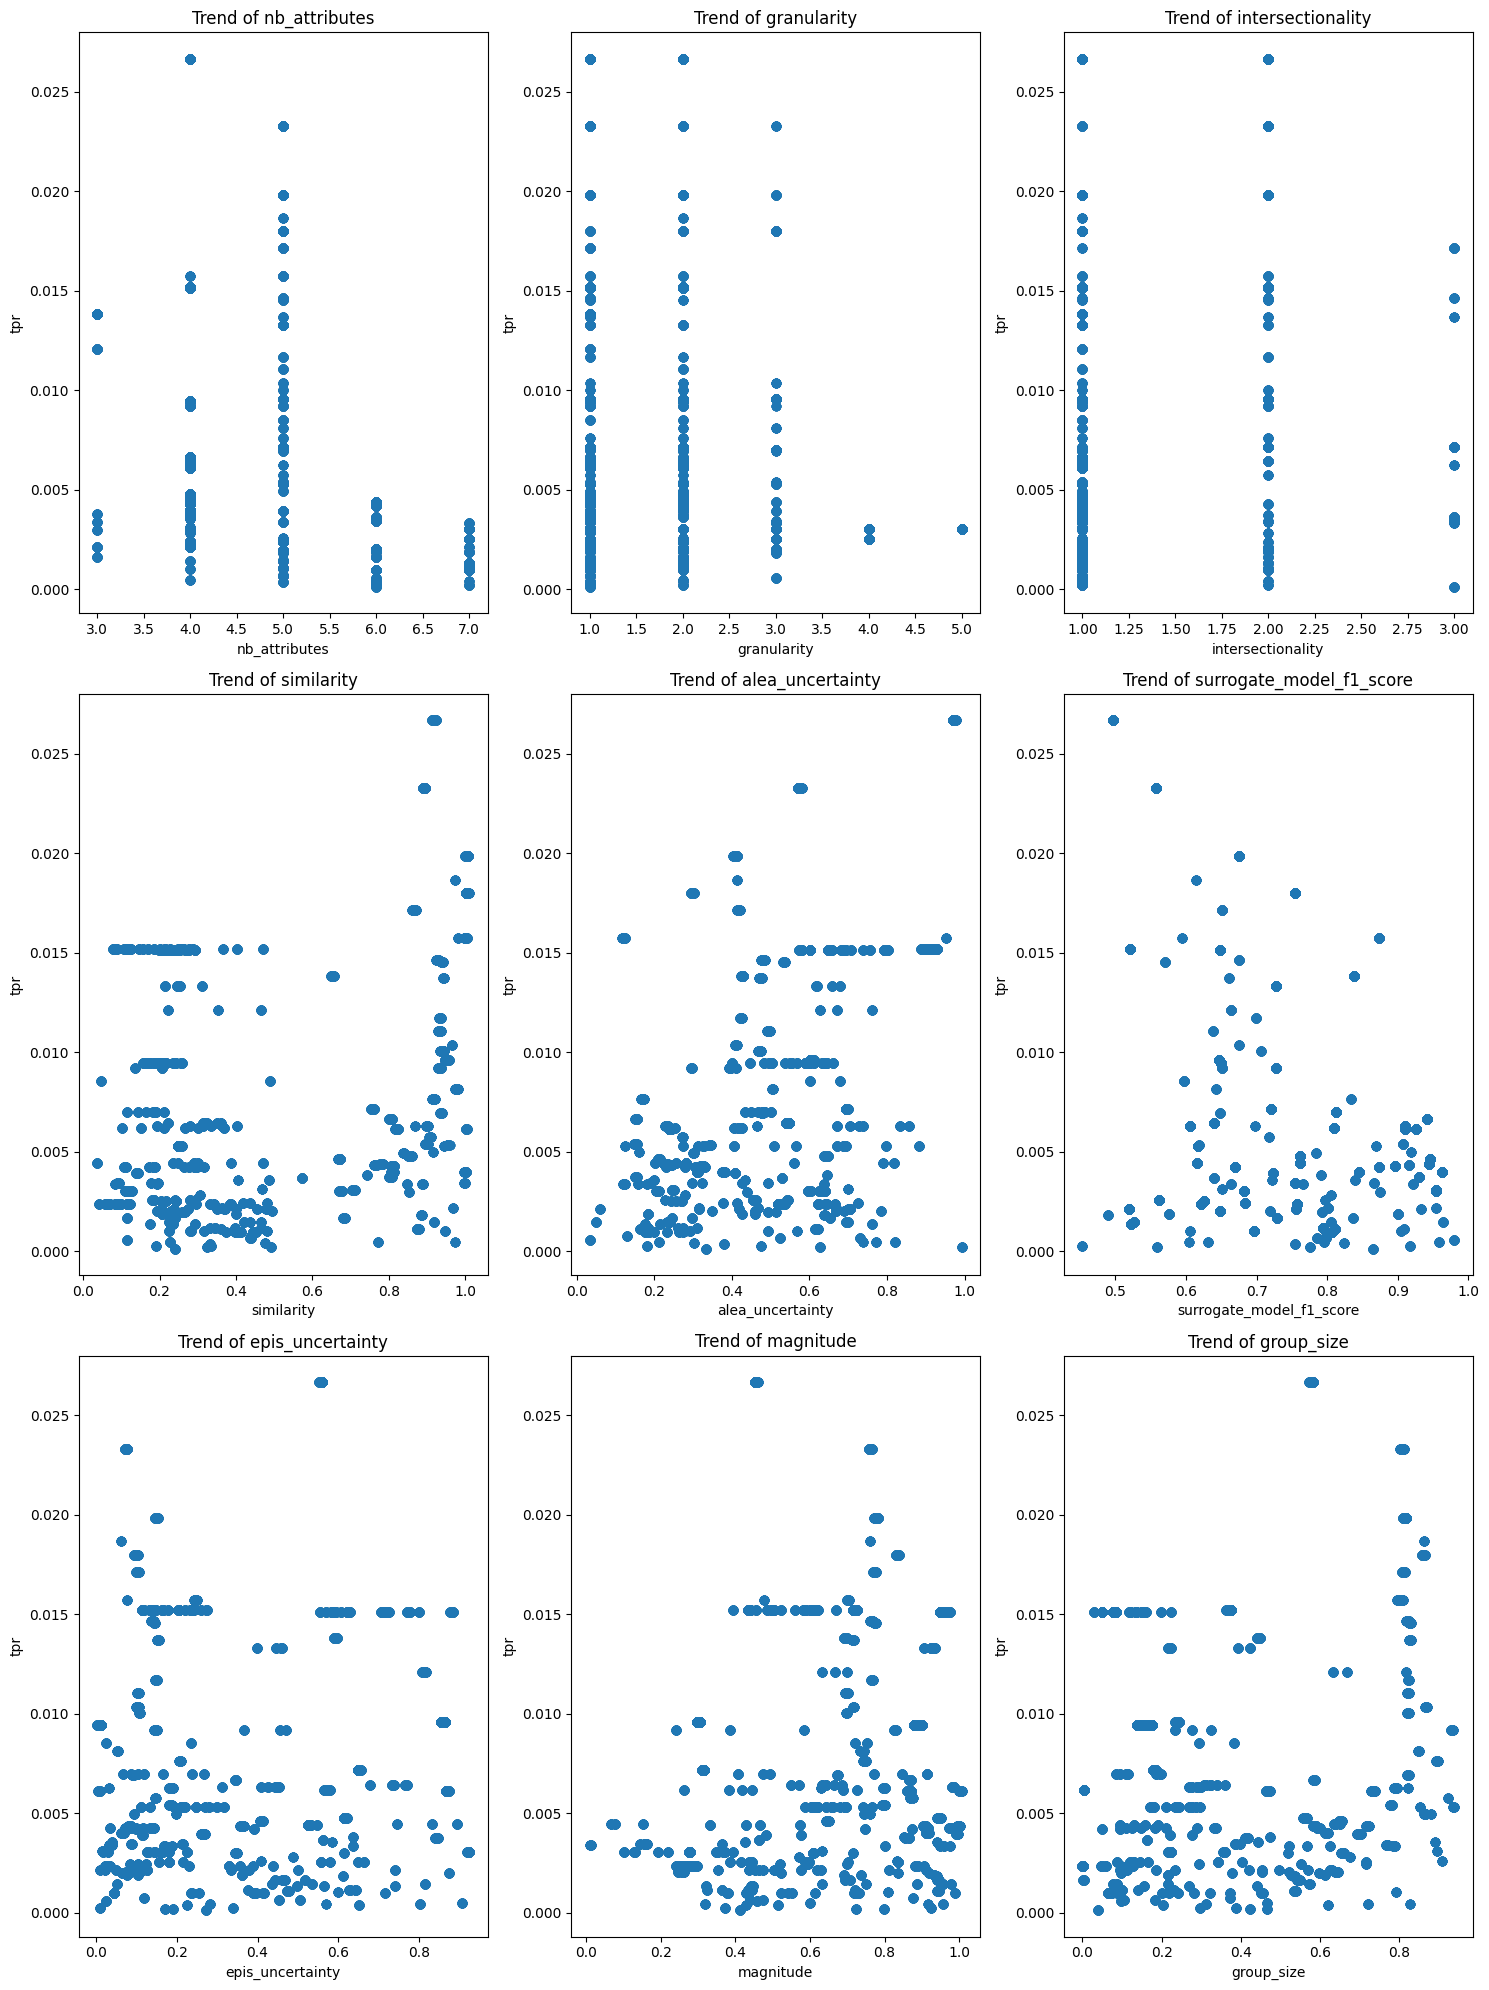

In [12]:
import matplotlib.pyplot as plt

def distr_graph_tries(dff, properties, savepath, col, title):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
    axes = axes.flatten()
    
    for i, prop in enumerate(properties):
        print(prop)
        axes[i].scatter(dff[prop], dff[col])
        axes[i].set_title(f'Trend of {prop}')
        axes[i].set_xlabel(prop)
        axes[i].set_ylabel(title)
    
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

props = ['nb_attributes', 'granularity', 'intersectionality', 'similarity', 'alea_uncertainty', 'surrogate_model_f1_score',
        'epis_uncertainty', 'magnitude', 'group_size']
# distr_graph_tries(dff, props , 'figuree_tpr.png', 'ratio_of_found_cases', 'tpr')
distr_graph_tries(dff, props, 'figuree_tpr.png', 'couple_tpr', 'tpr')

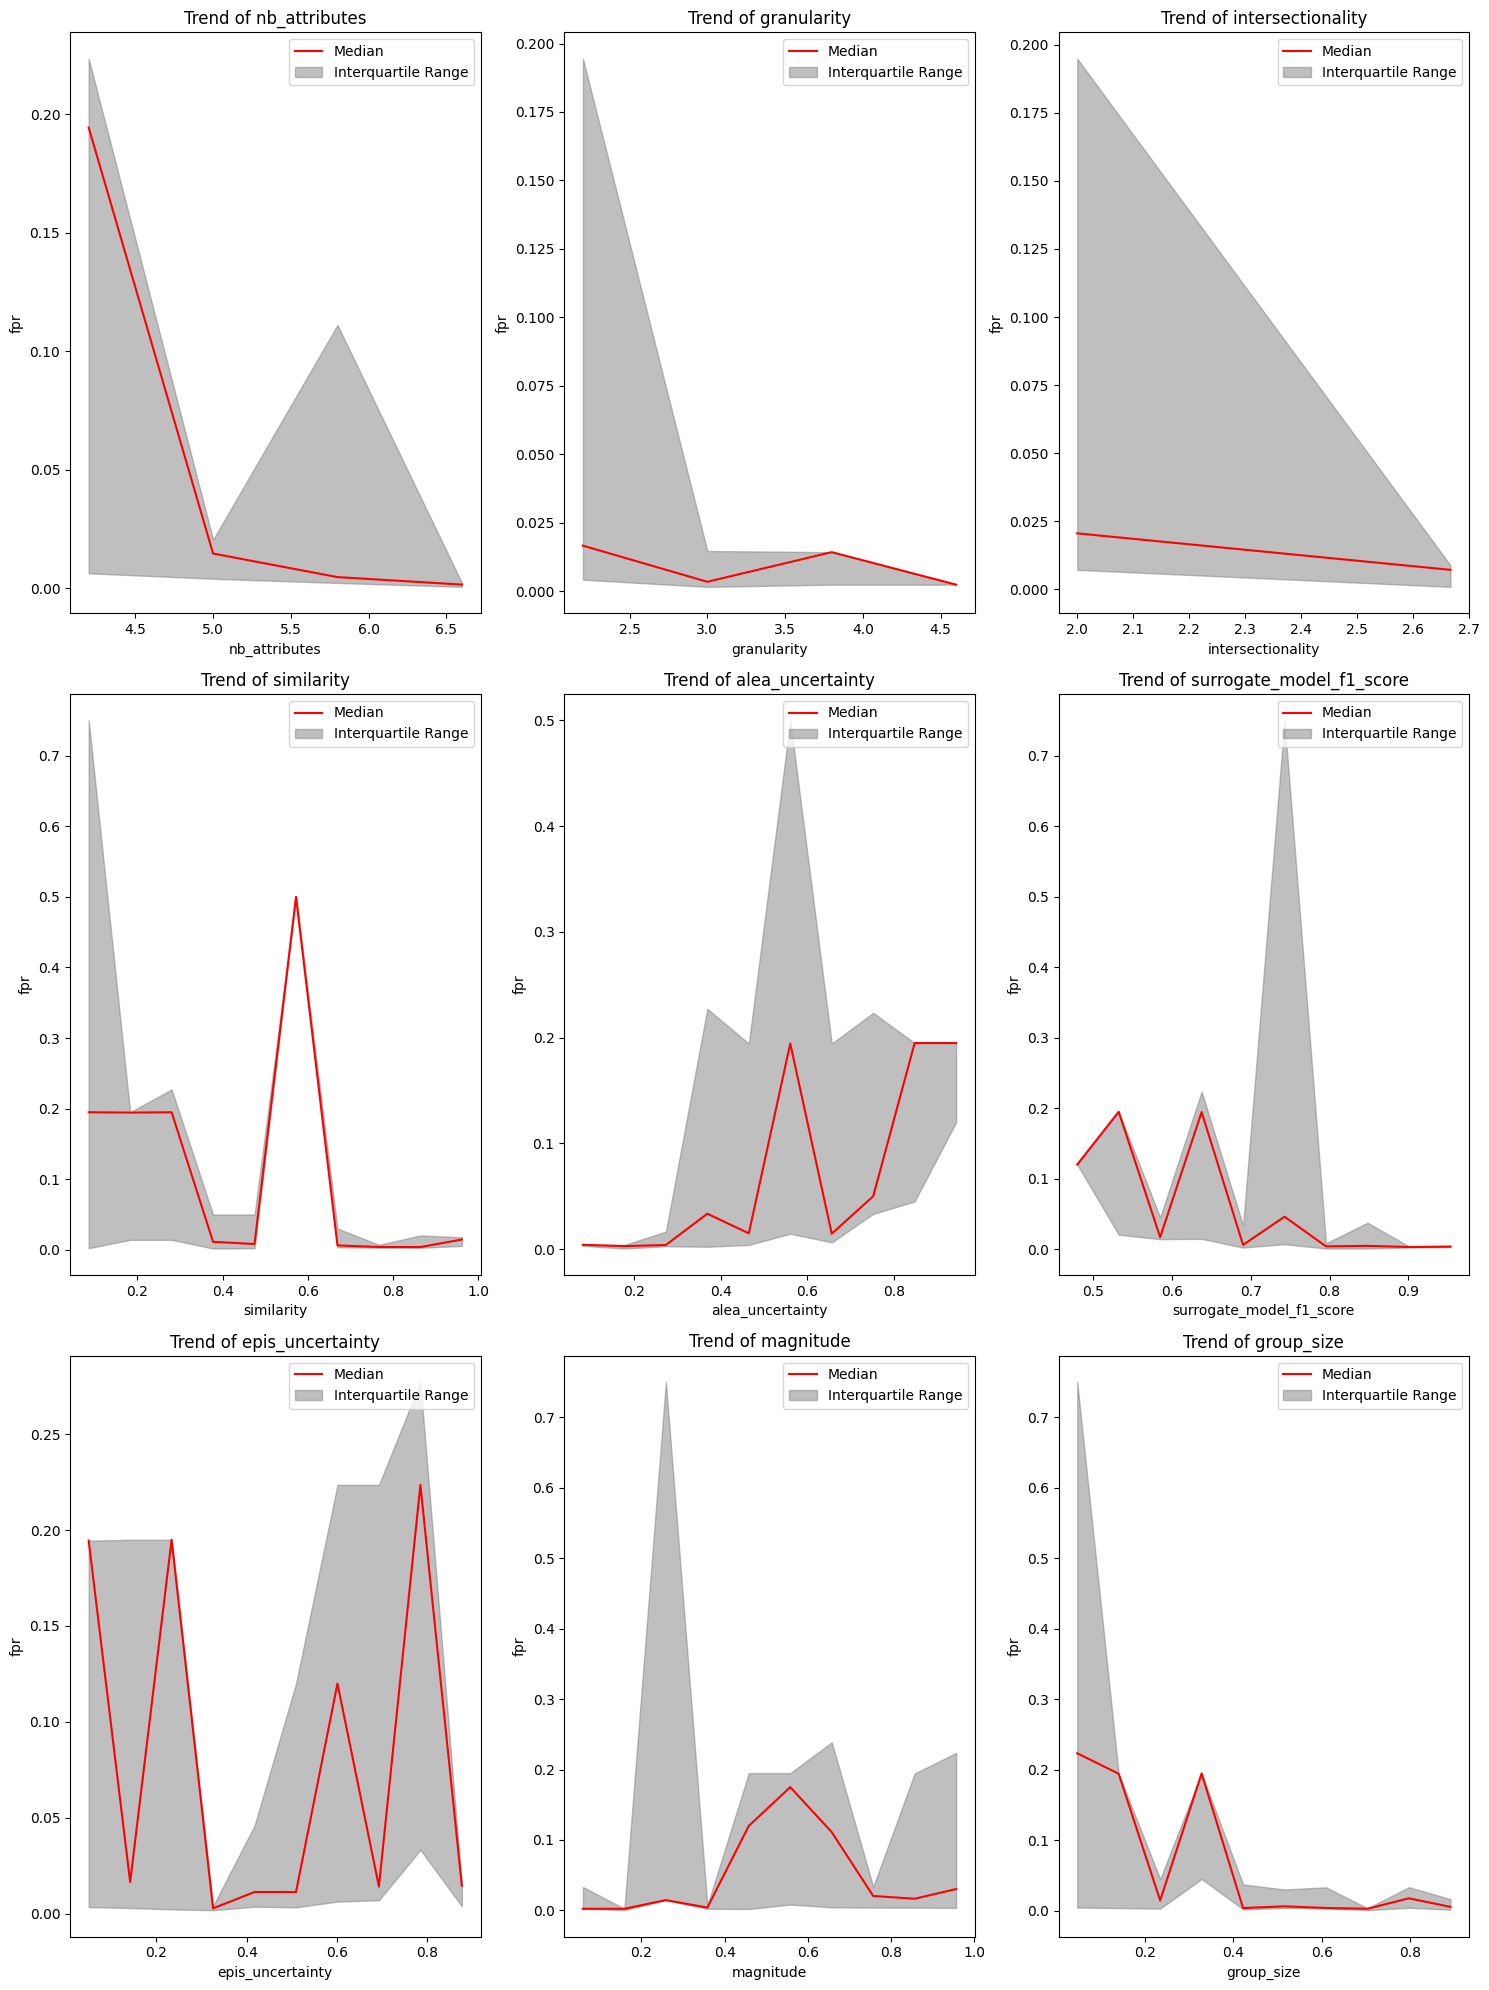

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def median_graph(dff, properties, savepath, col, title):

    def bin_and_statistics(data, k):
        if data.shape[1] != 2:
            raise ValueError("Data must be a 2-dimensional array with shape (N, 2)")
    
        # Dynamically set k based on the unique values in the property
        unique_values = len(np.unique(data[:, 0]))
        k = min(k, unique_values)
        if k < 1:
            k = 1  # Ensure at least one bin
    
        min_val = np.min(data[:, 0])
        max_val = np.max(data[:, 0])
        
        bins = np.linspace(min_val, max_val, k + 1)
        bin_indices = np.digitize(data[:, 0], bins, right=True)
        
        # Statistics arrays
        medians = np.zeros(k)
        first_quartiles = np.zeros(k)
        third_quartiles = np.zeros(k)
        
        for i in range(1, k + 1):
            bin_elements = data[bin_indices == i, 1]
            
            if bin_elements.size > 0:
                medians[i - 1] = np.median(bin_elements)
                first_quartiles[i - 1] = np.percentile(bin_elements, 25)
                third_quartiles[i - 1] = np.percentile(bin_elements, 75)
            else:
                medians[i - 1] = np.nan  # Use NaN for empty bins
                first_quartiles[i - 1] = np.nan
                third_quartiles[i - 1] = np.nan
    
        return bins, medians, first_quartiles, third_quartiles
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
    axes = axes.flatten()
    
    for i, prop in enumerate(properties):
        if pd.api.types.is_numeric_dtype(dff[prop]):  # Check if the property is numeric
            data = dff[[prop, col]].dropna().to_numpy()
            if data.size == 0:
                continue  # Skip if no data to plot
            bins, medians, first_quartiles, third_quartiles = bin_and_statistics(data, 10)
            bin_midpoints = (bins[:-1] + bins[1:]) / 2
    
            # Plotting median line
            axes[i].plot(bin_midpoints, medians, color='red', label='Median')
            # Plotting the uncertainty area between the first and third quartiles
            axes[i].fill_between(bin_midpoints, first_quartiles, third_quartiles, color='gray', alpha=0.5, label='Interquartile Range')
    
            axes[i].set_title(f'Trend of {prop}')
            axes[i].set_xlabel(prop)
            axes[i].set_ylabel(title)
            axes[i].legend()
        else:
            axes[i].text(0.5, 0.5, f'Non-numeric data: {prop}', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
            axes[i].set_title(f'Trend of {prop}')
    
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

props = ['nb_attributes', 'granularity', 'intersectionality', 'similarity', 'alea_uncertainty', 'surrogate_model_f1_score',
        'epis_uncertainty', 'magnitude', 'group_size']

# median_graph(dff, props, 'median_graph_tpr.png', 'ratio_of_found_cases', 'tpr')
median_graph(dff, props, 'median_graph_fpr.png', 'couple_fpr', 'fpr')

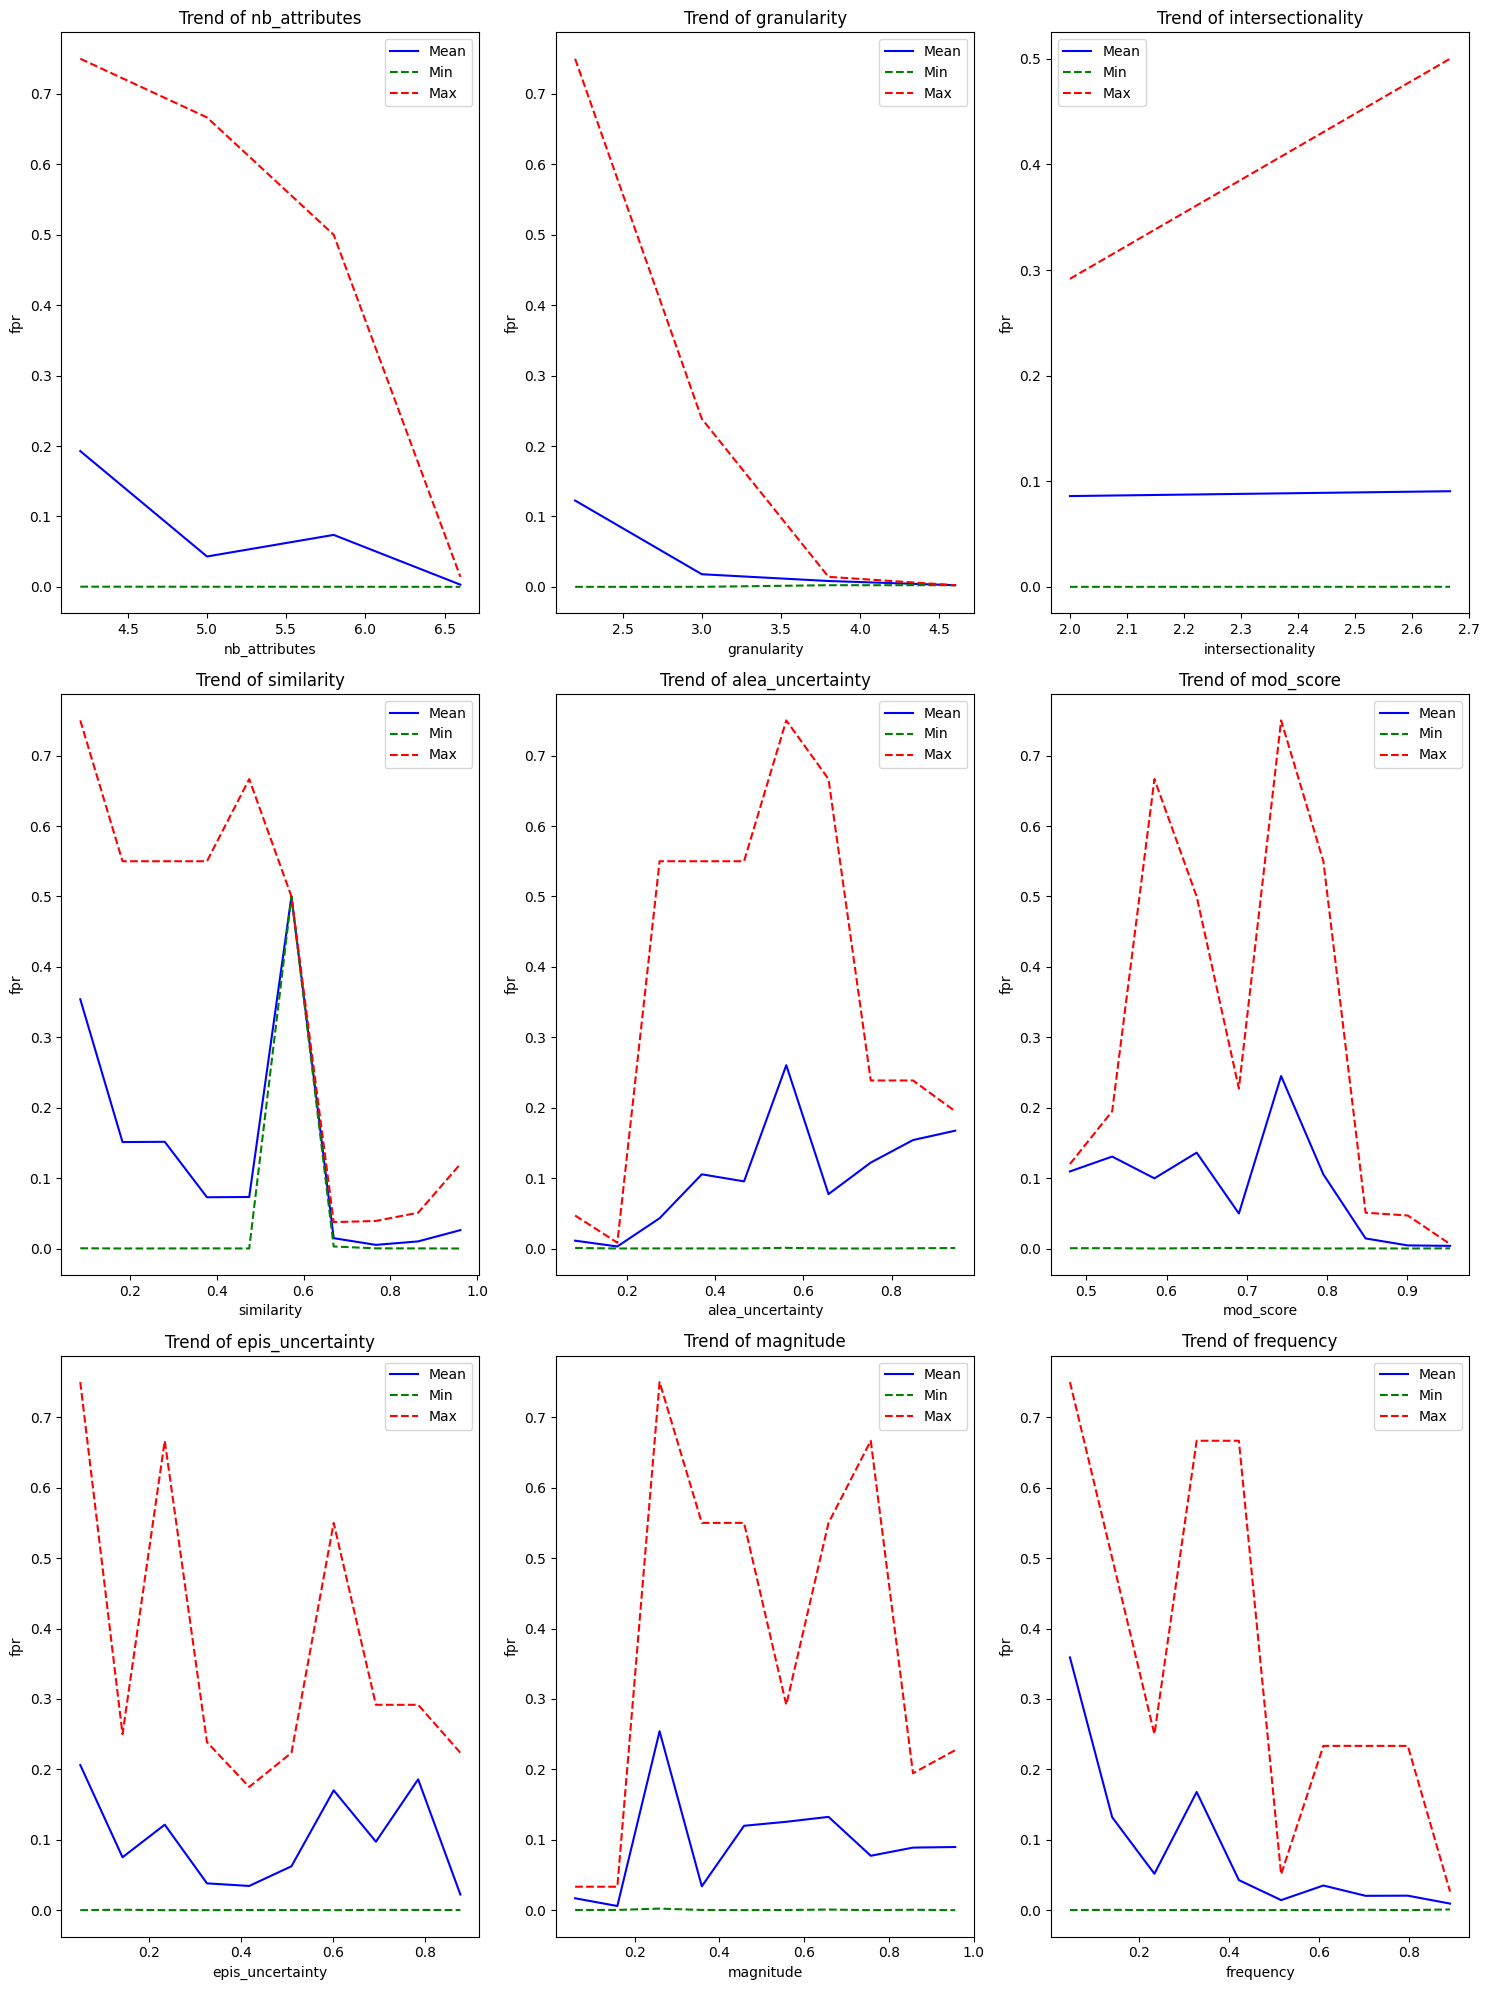

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def min_mean_max_figure(dff, properties, savepath, col, title):
    def bin_and_statistics(data, k):
        if data.shape[1] != 2:
            raise ValueError("Data must be a 2-dimensional array with shape (N, 2)")
    
        unique_values = len(np.unique(data[:, 0]))
        k = min(k, unique_values)
        if k < 1:
            k = 1  # Ensure at least one bin
    
        min_val = np.min(data[:, 0])
        max_val = np.max(data[:, 0])
        
        bins = np.linspace(min_val, max_val, k + 1)
        bin_indices = np.digitize(data[:, 0], bins, right=True)
        
        # Statistics arrays
        means = np.zeros(k)
        mins = np.zeros(k)
        maxs = np.zeros(k)
        
        for i in range(1, k + 1):
            bin_elements = data[bin_indices == i, 1]
            
            if bin_elements.size > 0:
                means[i - 1] = np.mean(bin_elements)
                mins[i - 1] = np.min(bin_elements)
                maxs[i - 1] = np.max(bin_elements)
            else:
                means[i - 1] = np.nan  # Use NaN for empty bins
                mins[i - 1] = np.nan
                maxs[i - 1] = np.nan
    
        return bins, mins, means, maxs
    
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 20))
    axes = axes.flatten()
    
    for i, prop in enumerate(properties):
        if pd.api.types.is_numeric_dtype(dff[prop]):
            data = dff[[prop, col]].dropna().to_numpy()
            if data.size == 0:
                continue
            bins, mins, means, maxs = bin_and_statistics(data, 10)
            bin_midpoints = (bins[:-1] + bins[1:]) / 2
    
            # Plotting mean line
            axes[i].plot(bin_midpoints, means, color='blue', label='Mean')
            # Plotting min and max lines
            axes[i].plot(bin_midpoints, mins, color='green', linestyle='--', label='Min')
            axes[i].plot(bin_midpoints, maxs, color='red', linestyle='--', label='Max')
    
            axes[i].set_title(f'Trend of {prop}')
            axes[i].set_xlabel(prop)
            axes[i].set_ylabel(title)
            axes[i].legend()
        else:
            axes[i].text(0.5, 0.5, f'Non-numeric data: {prop}', horizontalalignment='center', verticalalignment='center', transform=axes[i].transAxes)
            axes[i].set_title(f'Trend of {prop}')
    
    plt.tight_layout()
    plt.savefig(savepath)
    plt.show()

props = ['nb_attributes', 'granularity', 'intersectionality', 'similarity', 'alea_uncertainty', 'surrogate_model_f1_score',
        'epis_uncertainty', 'magnitude', 'group_size']

# min_mean_max_figure(dff, props, 'min_mean_max_figure_tpr.png', 'ratio_of_found_cases', 'tpr')
min_mean_max_figure(dff, props, 'min_mean_max_figure_fpr.png', 'couple_fpr', 'fpr')